# Plot SDSS Spectrum

In [2]:
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

In [3]:
help(fetch_sdss_spectrum)

Help on function fetch_sdss_spectrum in module astroML.datasets.sdss_spectrum:

fetch_sdss_spectrum(plate, mjd, fiber, data_home=None, download_if_missing=True, cache_to_disk=True)
    Fetch an SDSS spectrum from the Data Archive Server
    
    Parameters
    ----------
    plate: integer
        plate number of desired spectrum
    mjd: integer
        mean julian date of desired spectrum
    fiber: integer
        fiber number of desired spectrum
    
    Other Parameters
    ----------------
    data_home: string (optional)
        directory in which to cache downloaded fits files.  If not
        specified, it will be set to ~/astroML_data
    download_if_missing: boolean (default = True)
        download the fits file if it is not cached locally
    cache_to_disk: boolean (default = True)
        cache downloaded file to data_home
    
    Returns
    -------
    spec: :class:`astroML.tools.SDSSfits` object
        An object wrapper for the fits data



Fetch a single spectrum.

In [37]:
plate = 1615
mjd = 53166
fiber = 513

In [38]:
spec = fetch_sdss_spectrum(plate, mjd, fiber)

In [7]:
type(spec)

astroML.datasets.tools.sdss_fits.SDSSfits

Plot the spectrum.

In [18]:
wavelength = spec.wavelength()
spectrum = spec.spectrum
error = spec.error
z = spec.z

In [21]:
wavelength

array([3795.77097003, 3796.64507922, 3797.51938971, ..., 9217.22098659,
       9219.34357452, 9221.46665124])

In [22]:
spectrum

array([127.768, 127.742, 127.716, ..., 221.066, 221.068, 221.07 ],
      dtype=float32)

In [23]:
error

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [24]:
z

0.00657499

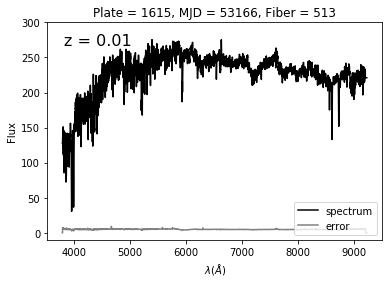

In [20]:
ax = plt.axes()
ax.plot(wavelength, spectrum, '-k', label='spectrum')
ax.plot(wavelength, error, '-', color='gray', label='error')

ax.legend(loc=4)
ax.set_title(
    'Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

ax.text(0.05, 0.95, 'z = %.2f' % z, size=16,
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

ax.set_ylim(-10, 300)

plt.show()

Examine HDU list.

In [27]:
type(spec.hdulist)

astropy.io.fits.hdu.hdulist.HDUList

In [28]:
spec.hdulist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1a20368208>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a224acb00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a226c4a58>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a225c22b0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a225c2da0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a225827b8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a22582ef0>]